In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date
import file

In [2]:
all_option_leverage = file.load_all_option_leverage()
all_symbols = all_option_leverage.keys()

In [ ]:
start_date = '2023-4-10' # start of MAGS history
# start_date = '2023-1-1' # start of uptrend
# start_date = '2021-1-1'
history_map = {}
symbols=[
        'SMH','USD',
        'SPY','QQQ','TQQQ','FNGS','IGM',
        'MAGS','MAGX',
        'NVDA'
         ]
for symbol in symbols:
    tickerData = yf.Ticker(symbol)
    history = tickerData.history(interval='1wk', start=start_date, end=date.today()) # prices are adjusted for splits
    print(f'{symbol} history: {len(history)}w')
    history_map[symbol] = history

SMH history: 92w
USD history: 92w
SPY history: 92w
QQQ history: 92w
TQQQ history: 92w
FNGS history: 92w
IGM history: 92w
MAGS history: 92w
MAGX history: 46w
NVDA history: 92w


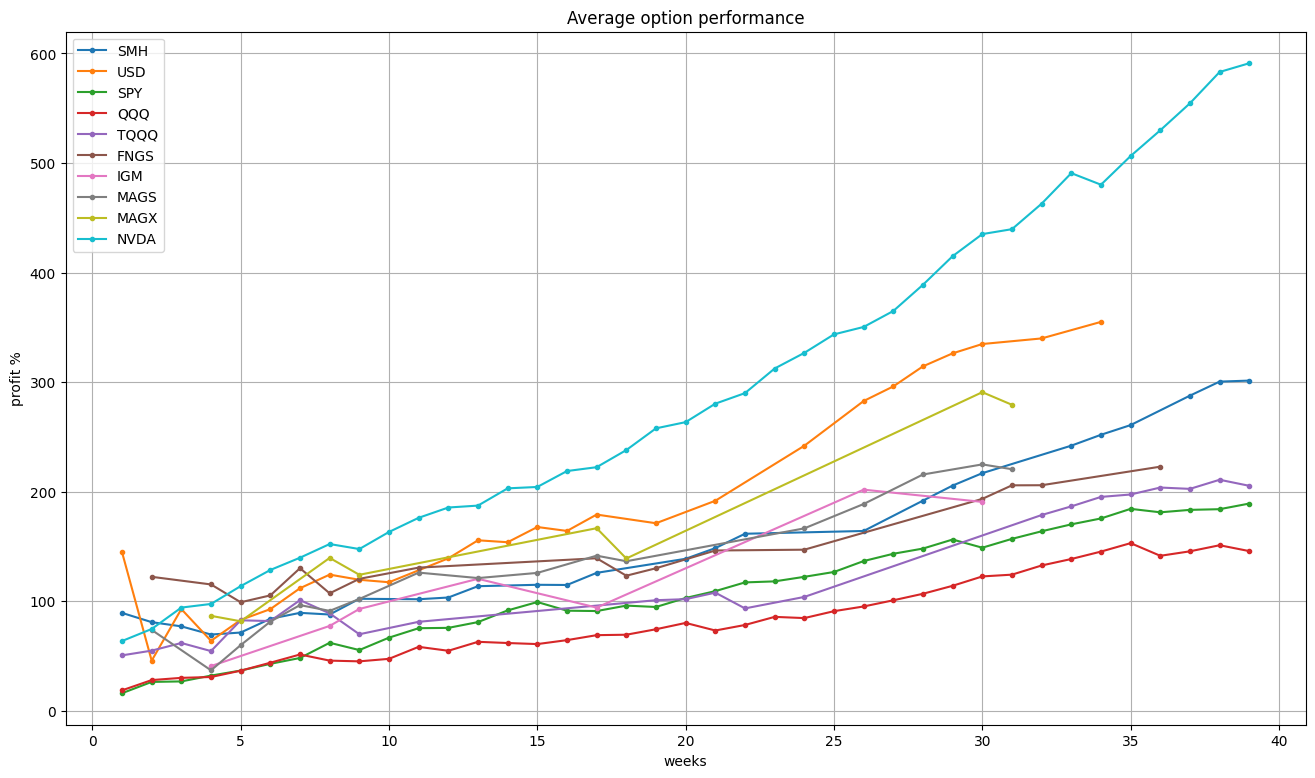

In [11]:
gap = 0 # %
max_weeks = 39 # 3Q

plt.figure(figsize=(16, 9))

for symbol, history in history_map.items():
    data = {}
    option_leverage = all_option_leverage[symbol]
    for weeks, lvr in sorted(option_leverage.items()):
        if weeks > max_weeks:
            break
        stock_changes = history['Close'].pct_change(periods=weeks) * 100
        option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
        profit = option_profits.mean() #* 52 / weeks
        data[weeks] = profit
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Average option performance')
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()

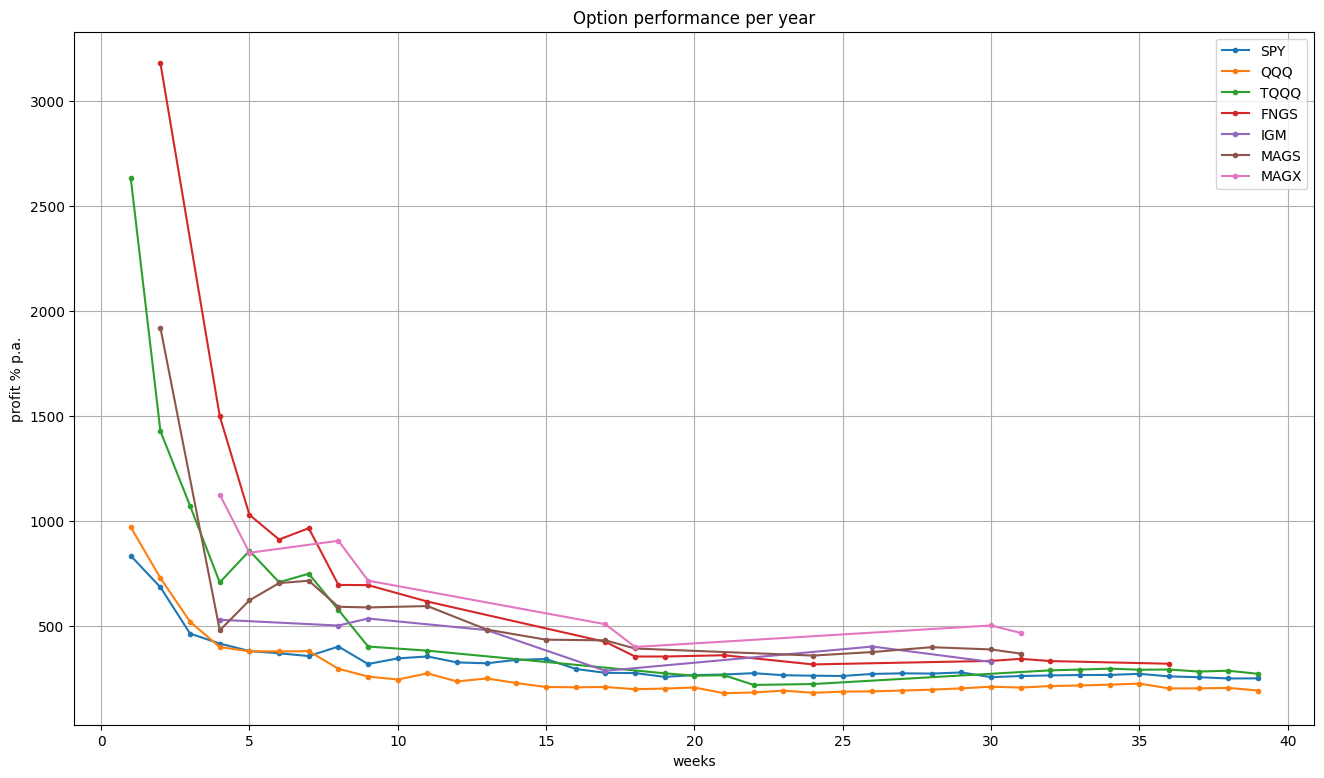

In [5]:
gap = 0 # %
max_weeks = 39 # 3Q

plt.figure(figsize=(16, 9))

for symbol, history in history_map.items():
    if symbol in ['USD','SMH','NVDA']: continue
    data = {}
    option_leverage = all_option_leverage[symbol]
    for weeks, lvr in sorted(option_leverage.items()):
        if 1 <= weeks <= max_weeks:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
            profit = option_profits.mean() / weeks * 52
            data[weeks] = profit
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Option performance per year')
plt.xlabel('weeks')
plt.ylabel('profit % p.a.')
plt.grid()
plt.show()

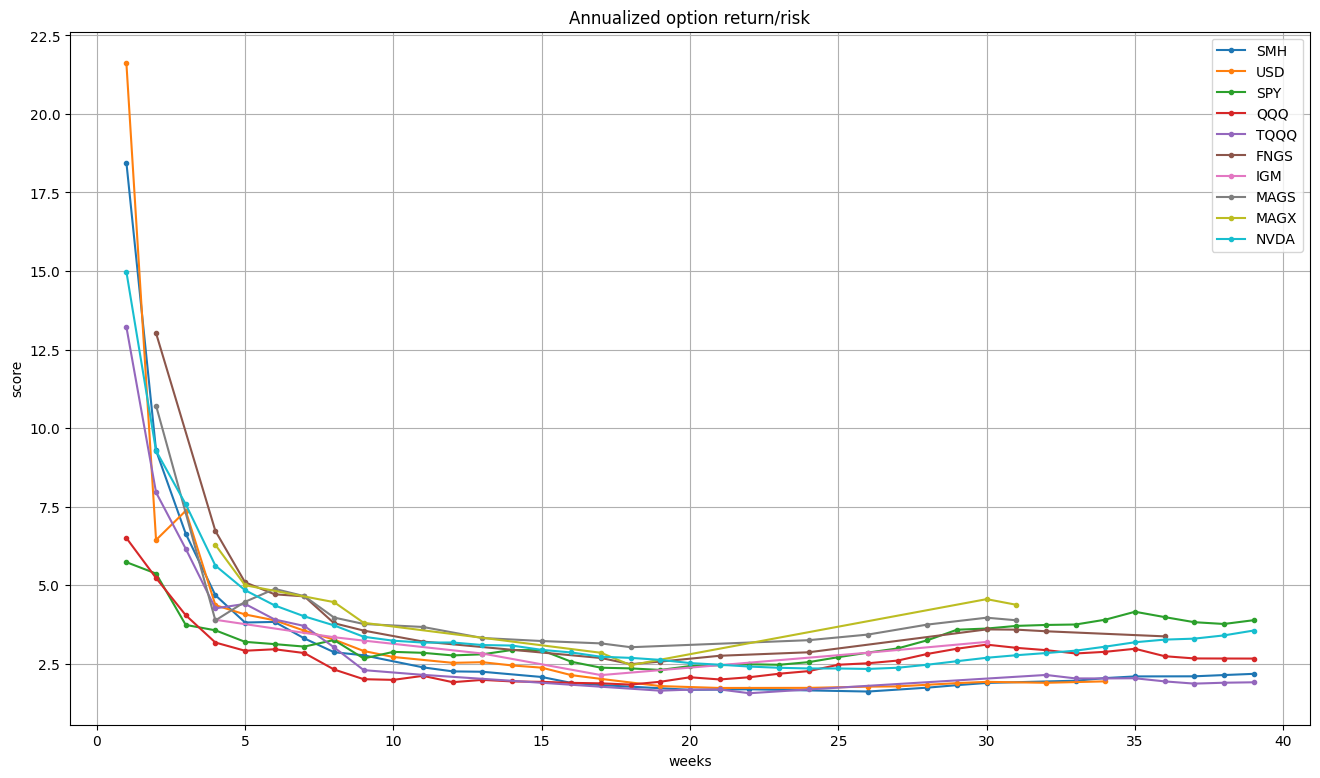

In [6]:
gap = 0 # %
max_weeks = 39 # 3Q

plt.figure(figsize=(16, 9))

for symbol, history in history_map.items():
    data = {}
    option_leverage = all_option_leverage[symbol]
    for weeks, lvr in sorted(option_leverage.items()):
        if weeks <= max_weeks:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
            profit = option_profits.mean() * 52 / weeks / option_profits.std()
            data[weeks] = profit
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Annualized option return/risk')
plt.xlabel('weeks')
plt.ylabel('score')
plt.grid()
plt.show()

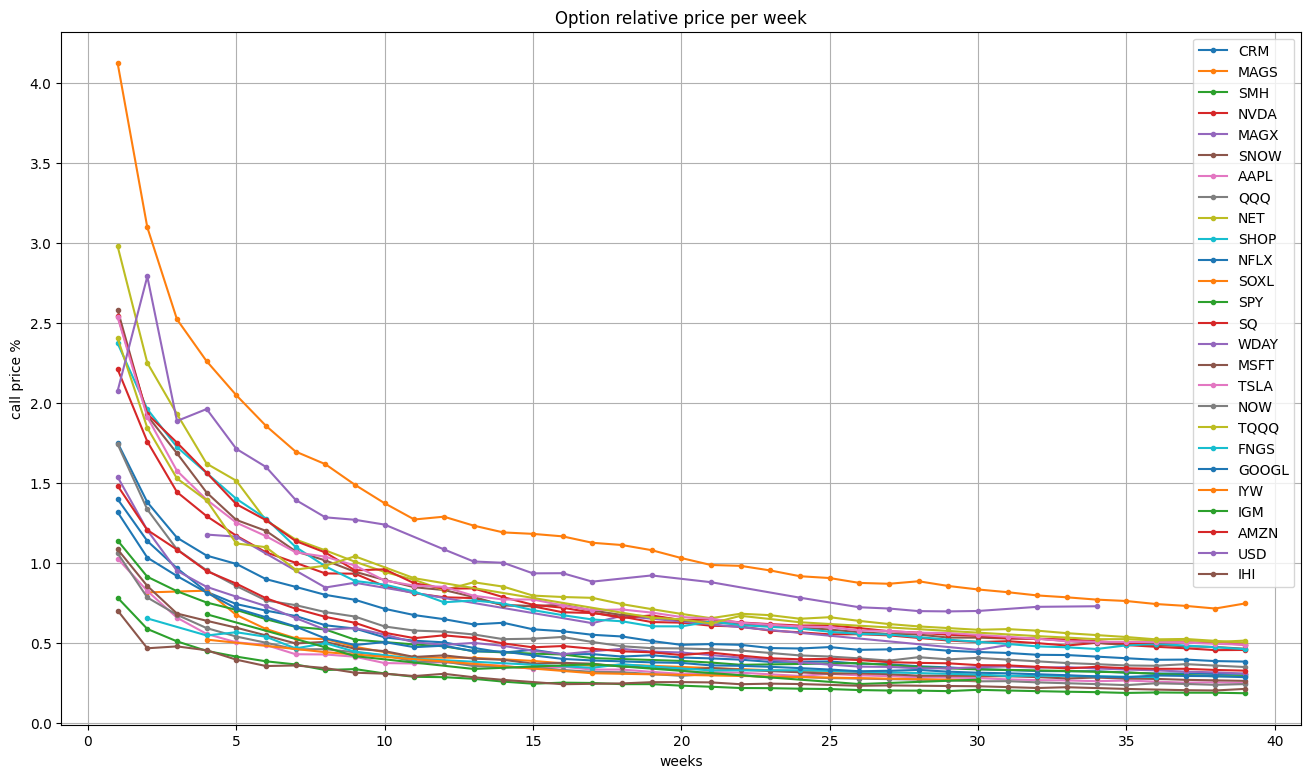

In [7]:
gap = 0 # %
max_weeks = 39 # 3Q

plt.figure(figsize=(16, 9))

for symbol, option_leverage in all_option_leverage.items():
    data = {}
    for weeks, lvr in sorted(option_leverage.items()):
        if weeks <= max_weeks:
            data[weeks] = (100 / lvr) / weeks
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Option relative price per week')
plt.xlabel('weeks')
plt.ylabel('call price %')
plt.grid()
plt.show()

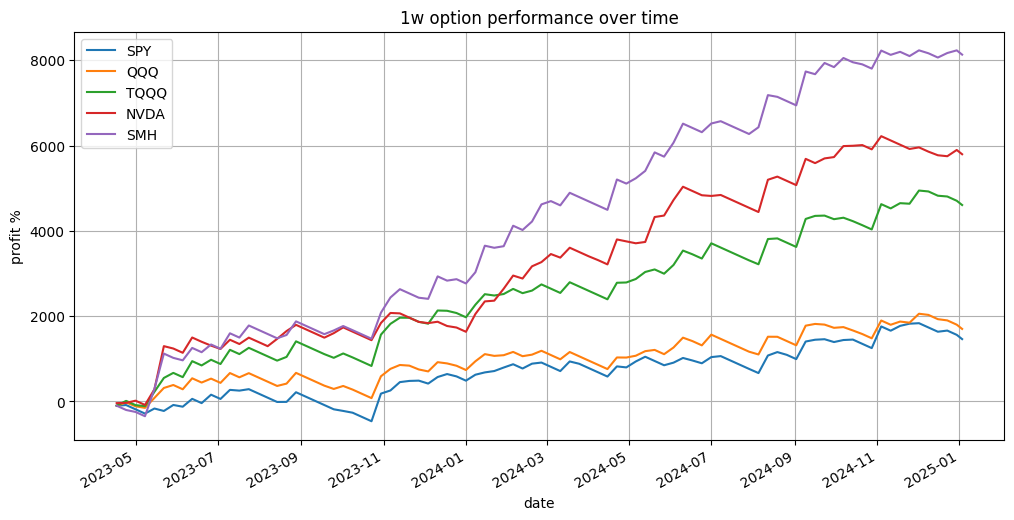

In [8]:
plt.figure(figsize=(12,6))

weeks = 1
for symbol in ['SPY','QQQ','TQQQ',
               'NVDA','SMH'
               ]:
    if symbol in all_option_leverage and weeks in all_option_leverage[symbol]:
        lvr = all_option_leverage[symbol][weeks]
        stock_changes = history_map[symbol]['Close'].pct_change(periods=weeks) * 100
        option_profits = (stock_changes[weeks:] * lvr - 100).clip(lower=-100) / weeks
        option_profits.cumsum().plot(label=symbol)

plt.title(f'{weeks}w option performance over time')
plt.legend()
plt.xlabel('date')
plt.ylabel('profit %')
plt.grid()

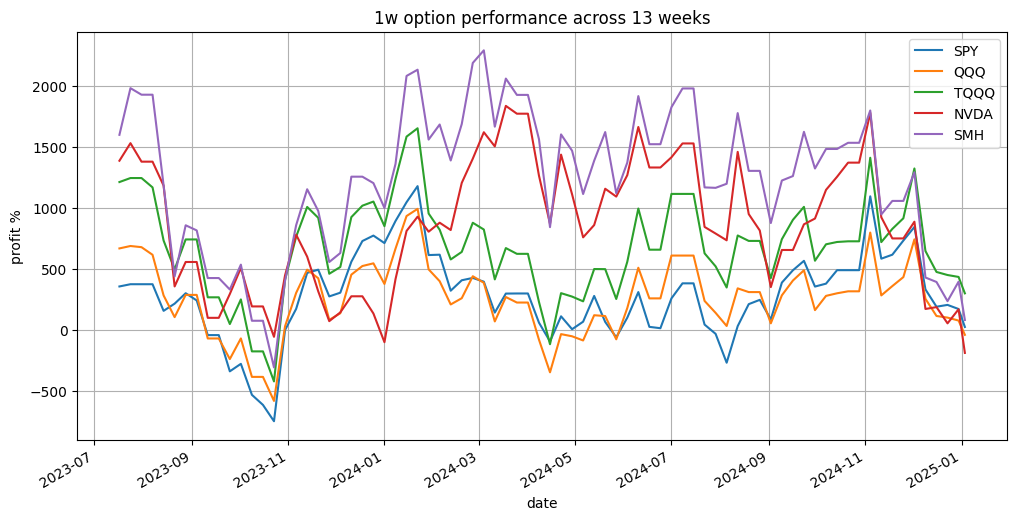

In [9]:
plt.figure(figsize=(12, 6))

weeks = 1
span = 13
for symbol in [
    'SPY', 'QQQ',
    'TQQQ',
    'NVDA', 'SMH'
]:
    if symbol in all_option_leverage and weeks in all_option_leverage[symbol]:
        lvr = all_option_leverage[symbol][weeks]
        stock_changes = history_map[symbol]['Close'].pct_change(
            periods=weeks) * 100
        option_profits = (stock_changes[weeks:] * lvr - 100).clip(lower=-100) / weeks
        option_profits.cumsum().diff(periods=span).plot(label=symbol)

plt.title(f'{weeks}w option performance across {span} weeks')
plt.legend()
plt.xlabel('date')
plt.ylabel('profit %')
plt.grid()